In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable

get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import time
import copy

import os
import PIL

# get_ipython().run_line_magic('load_ext', 'autoreload')
# get_ipython().run_line_magic('autoreload', '2')

# from caltech256_will import Caltech256
print(torch.cuda.is_available())

False


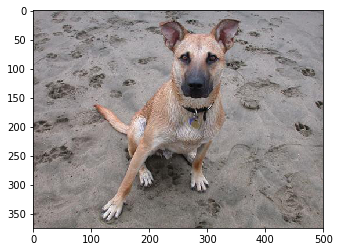

In [8]:
vis_transform = transforms.Compose([
        transforms.Scale(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

img_path = '/datasets/Caltech256/256_ObjectCategories/056.dog/056_0002.jpg'

# visualize image
img = mpimg.imread(img_path)
plt.figure()
plt.imshow(img)

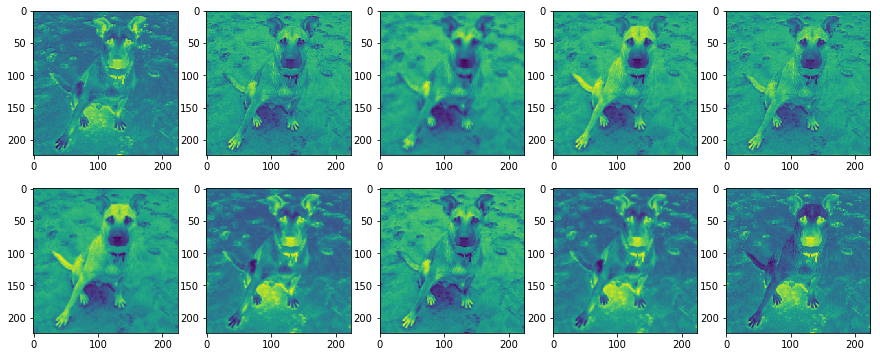

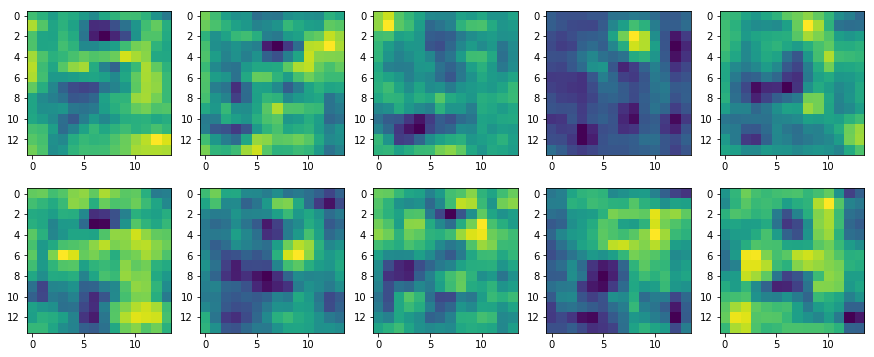

In [12]:
vgg16 = models.vgg16_bn(pretrained=True)
# print(vgg16)

layer_list = list(vgg16.features.modules())
layer_list = layer_list[1:]
# print(len(layer_list))

# load data
vis_img = PIL.Image.open(img_path).convert("RGB")
vis_img = vis_transform(vis_img)
vis_img = Variable(vis_img.unsqueeze(0))

def visualize(layer_list, layer_idx, img):
    
    act_maps_list = []
    # get output from target layer
    for idx, layer in enumerate(layer_list):
        img = layer(img)
        if idx in layer_idx:
            act_maps = img.data.squeeze().numpy()
            act_maps_list.append(act_maps)

    # plot heatmap of activation maps (plot 10)
    for j,act_maps in enumerate(act_maps_list):
        plt.figure(figsize=(15, 6))
        for i in range(10):
            plt.subplot(2, 5, i+1)
            plt.imshow(act_maps[i, :, :])
        plt.savefig('conv_activations_{}.png'.format(j))
        
visualize(layer_list, (0, 40), vis_img)

(64, 3, 3, 3)


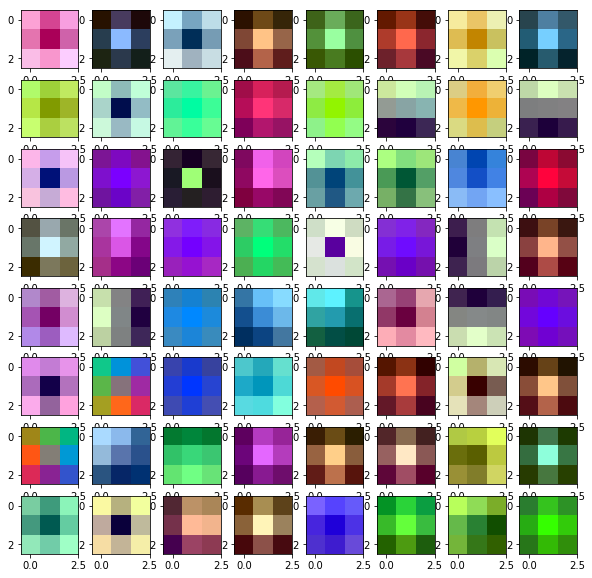

In [18]:
vgg16 = models.vgg16_bn(pretrained=True)

layer_list = list(vgg16.features.modules())
layer_list = layer_list[1:]

# load data
vis_img = PIL.Image.open(img_path).convert("RGB")
vis_img = vis_transform(vis_img)
vis_img = Variable(vis_img.unsqueeze(0))

def visualize(layer_list, layer_idx, img):
    
    # get output from target layer
    for idx, layer in enumerate(layer_list):
        img = layer(img)
        if idx == layer_idx:
            break

    # get conv filters from target layer
    for p in layer.parameters():
        conv_filters = p.data.numpy()
        print(conv_filters.shape)
        break

    plt.figure(figsize=(10,10))
    for i in range(64):
        plt.subplot(8, 8, i+1)
        cf = conv_filters[i, :, :, :]
#         print(cf.shape)
        cf = np.transpose(cf, (1,2,0))
        cf -= np.min(cf)
        cf /= np.max(cf) 
        plt.imshow(cf)
    plt.savefig('conv1_filters.png')
        
visualize(layer_list, 0, vis_img)


In [ ]:
# vgg16 = models.vgg16_bn(pretrained=True)

# layer_list = list(vgg16.features.modules())
# layer_list = layer_list[1:]

# # load data
# img_path = '/datasets/Caltech256/256_ObjectCategories/056.dog/056_0002.jpg'
# vis_img = PIL.Image.open(img_path).convert("RGB")
# vis_img = vis_transform(vis_img)
# vis_img = Variable(vis_img.unsqueeze(0))

# def visualize(layer_list, layer_idx, img):
    
#     # get output from target layer
#     for idx, layer in enumerate(layer_list):
#         img = layer(img)
#         if idx == layer_idx:
#             act_maps = img.data.squeeze().numpy()
#             break

#     # plot heatmap of activation maps (plot 20)
#     plt.figure(figsize=(15, 6))
#     for i in range(10):
#         plt.subplot(2, 5, i+1)
#         plt.imshow(act_maps[i, :, :])
#     plt.savefig('conv_last_activations.png')
        
# visualize(layer_list, 40, vis_img)

In [2]:
# import os
# import torch
# import torchvision.transforms as transforms
# from torch.utils.data import Dataset, DataLoader
# import PIL

# class ImageCaltech256(Dataset):
    
#     def __init__(self, img_path, transform=None):
#         self.num_images = 1
#         self.img_path = img_path
#         self.transform = transform
#         self.files = {}
#         self.files[img_path] = int(img_path.split('/')[-1][0:3])

#     def __len__(self):
#         return len(self.files)

#     def __getitem__(self, idx):
#         img_name, label = list(self.files.items())[idx]
#         image = PIL.Image.open(img_name).convert("RGB") # A few images are grayscale
#         label -= 1
#         #label = torch.Tensor([label])

#         if self.transform:
#             image = self.transform(image)
#         sample = (image, label)
#         return sample